In [ ]:
import pandas as pd 
import numpy as np 

def convert(val):
    val = str(val)
    if "k" in val:
        val = val.replace("k","")
        val = float(val)*1_000
    elif "M" in val:
        val = val.replace("M","")
        val = float(val)*1_000_000
    elif "B" in val:
        val = val.replace("B","")
        val = float(val)*1_000_000_000
    elif "TR" in val:
        val = val.replace("TR","")
        val = float(val)*1e12
    else:
        val = float(val)
    return val

# Import data 
gdp_percap = pd.read_csv("gdppercapita_us_inflation_adjusted.csv")
total_gdp = pd.read_csv("total_gdp_us_inflation_adjusted.csv")
gini = pd.read_csv("gini.csv")

# Set index to country 
gdp_percap = gdp_percap.set_index('country')
total_gdp = total_gdp.set_index('country')
gini = gini.set_index('country')

# Convert any string to a number - data prep - DONE 
gdp_percap_copy = gdp_percap.map(lambda x:convert(x),na_action = 'ignore')
total_gdp_copy = total_gdp.map(lambda x:convert(x),na_action = 'ignore')


# Merge the data together into hierarchical index - concat - DONE 
# Only outer to ensure data shares values 
# Make sure we have common countries to start 

combined_data = pd.concat([total_gdp_copy, gdp_percap_copy, gini], axis=0,join='inner', keys=['Total GDP', 'GDP Per Capita', 'Gini Coeff'])
combined_data.index.names = ['Metric', 'Country']

common_countries = list(set(gini.index.values) & set(total_gdp_copy.index.values) & set(gdp_percap_copy.index.values))
combined_data_fixed = combined_data[combined_data.index.isin(common_countries,level='Country')]

#gini[~gini.index.isin(gdp_percap.index) ].index
#gdp_percap[~gdp_percap.index.isin(gini.index) ].index

rows, columns = combined_data.shape
print(f'rows: {rows} cols: {columns}')





rows: 621 cols: 64


In [65]:
# Check for any country with more than X NANs 
#Canada = combined_data.xs('Canada', level='Country')
#Canada_GDP_2023 = combined_data.xs('Total GDP', level='Metric').loc['Canada', '2023']
#combined_data.isnull().sum()
idx = pd.IndexSlice
combined_data.loc[idx[:,('USA','UK','Brazil','China','Poland','Ukraine','Ireland')],idx[:]]
#combined_data_fixed.loc[idx[:,'Taiwan'],idx[:]]
#print(*combined_data_fixed.groupby('Country'))

# Drop or handle 
# Plot every country per year?? 
# Plot continent blocks?? 
# Look for any outliers 
# Explain those 
# Plot average, median, etc. global GDP per year?? 

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Metric,Country,,,,,,,,,,,,,,,,,,,,,
Total GDP,USA,3430000000000.0,3510000000000.0,3720000000000.0,3890000000000.0,4110000000000.000488,4380000000000.0,4660000000000.0,4780000000000.0,5010000000000.0,5160000000000.0,...,17800000000000.0,18300000000000.0,18600000000000.0,19100000000000.0,19700000000000.0,20200000000000.0,19700000000000.0,20900000000000.0,21400000000000.0,22100000000000.0
GDP Per Capita,USA,19000.0,19100.0,20000.0,20500.0,21400.0,22500.0,23700.0,24000.0,24900.0,25500.0,...,55800.0,57000.0,57700.0,58700.0,60100.0,61400.0,59500.0,63000.0,64300.0,65900.0
Gini Coeff,USA,36.7,37.5,36.5,36.3,36.3,36.2,35.8,36.1,35.0,35.2,...,41.5,41.2,41.1,41.2,41.4,41.4,42.6,44.0,45.1,45.9
Total GDP,UK,793000000000.0,815000000000.0,824000000000.0,864000000000.0,912000000000.0,931000000000.0,946000000000.0,972000000000.0,1030000000000.0,1050000000000.0,...,2860000000000.0,2930000000000.0,2980000000000.0,3060000000000.0,3110000000000.0,3160000000000.0,2830000000000.0,3070000000000.0,3220000000000.0,3230000000000.0
GDP Per Capita,UK,15100.0,15400.0,15500.0,16100.0,16900.0,17100.0,17300.0,17700.0,18600.0,18900.0,...,44300.0,45000.0,45500.0,46400.0,46700.0,47200.0,42200.0,45900.0,47600.0,47300.0
Gini Coeff,UK,32.7,32.8,31.7,34.2,33.7,32.4,33.7,32.7,32.6,33.7,...,34.0,33.2,34.8,35.1,36.0,36.0,36.8,37.7,38.4,39.0
Total GDP,Brazil,188000000000.0,205000000000.0,218000000000.0,219000000000.0,227000000000.0,232000000000.0,248000000000.0,258000000000.0,284000000000.0,311000000000.0,...,1870000000000.0,1800000000000.0,1740000000000.0,1770000000000.0,1800000000000.0,1820000000000.0,1760000000000.0,1840000000000.0,1900000000000.0,1950000000000.0
GDP Per Capita,Brazil,2600,2740,2840,2770,2790,2770,2880,2920,3130,3340,...,9340,8940,8580,8630,8720,8770,8440,8800,9030,9260
Gini Coeff,Brazil,55.3,55.7,56.1,56.5,56.8,57.1,57.3,57.5,57.6,57.8,...,52.1,51.9,53.3,53.3,53.9,53.4,54.6,56.1,57.1,58.0


['Seychelles', 'Malta', 'Canada', 'Zambia', 'Kiribati', 'Iraq', 'Panama', 'Philippines', 'Botswana', 'Togo', 'Ghana', 'Costa Rica', 'Algeria', 'Trinidad and Tobago', 'Kuwait', 'Ukraine', 'Netherlands', 'Finland', 'Central African Republic', 'Micronesia, Fed. Sts.', 'Haiti', 'Bahamas', 'Luxembourg', 'Sudan', 'Malawi', 'Spain', 'Tajikistan', 'Guinea-Bissau', 'South Korea', 'New Zealand', 'Bosnia and Herzegovina', 'Somalia', 'Benin', 'Barbados', 'Burundi', 'Grenada', "Cote d'Ivoire", 'Eswatini', 'Uzbekistan', 'Kazakhstan', 'Hungary', 'Ecuador', 'Cameroon', 'Djibouti', 'Australia', 'Latvia', 'Jordan', 'Syria', 'Vietnam', 'Madagascar', 'Colombia', 'St. Kitts and Nevis', 'Nigeria', 'Turkey', 'Mali', 'Angola', 'Denmark', 'UAE', 'USA', 'Moldova', 'Lebanon', 'Bahrain', 'Lao', 'Sri Lanka', 'Andorra', 'Monaco', 'Comoros', 'Belize', 'Saudi Arabia', 'Solomon Islands', 'Montenegro', 'Lithuania', 'France', 'Bangladesh', 'Serbia', 'Oman', 'Liechtenstein', 'South Africa', 'Israel', 'Czech Republic', 'B

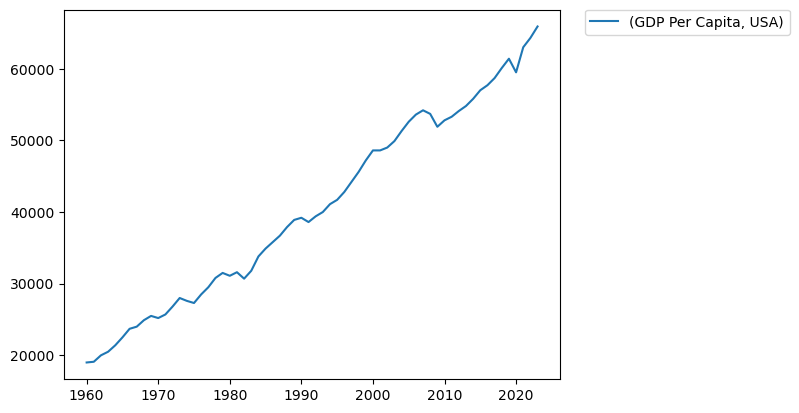

Metric  Gini Coeff                
Country        USA Ireland Ukraine
1960          36.7    43.0    36.8
1961          37.5    42.7    36.7
1962          36.5    42.2    36.5
1963          36.3    41.5    36.4
1964          36.3    40.6    36.3
...            ...     ...     ...
2019          41.4    31.4    26.6
2020          42.6    32.0    27.3
2021          44.0    32.7    28.2
2022          45.1    33.2    28.8
2023          45.9    33.6    29.3

[64 rows x 3 columns]
MultiIndex([('Gini Coeff',     'USA'),
            ('Gini Coeff', 'Ireland'),
            ('Gini Coeff', 'Ukraine')],
           names=['Metric', 'Country'])
Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '

KeyError: ('GDP Per Capita', 'Ireland')

In [76]:
# Tasks going forward:
# - User Entry
#     - Prompt user to enter some number of countries, and a start year and end year.
#     - Returns a tuple of ([list of Strings as country names], [list of start year, end year]).

# - Plotting:
#     - Plot for each metric containing:
#         - all contries and global average for time slice. 

# Advanced index slicing per countries, expecting them to come in as a list from input() 
# Advanced slicing coming in as a list for year to year 
# To split an input string 
import matplotlib.pyplot as plt 
#print(combined_data_fixed.head())
print(common_countries)
countries = ['USA','Ireland','Ukraine']
#country_list = common_countries
years = ['1960','2023'] 
def plotter(df, country_list, year_range, data_section):
    idx = pd.IndexSlice
    sub_df = df.loc[idx[data_section,country_list],idx[year_range[0]:year_range[-1]]]
    print(sub_df.transpose())
    sub_df = sub_df.transpose()
    print(sub_df.columns)
    print(sub_df.index)
    print(type(sub_df['GDP Per Capita','Ireland']['1960']))
    sub_df.plot() 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

plotter(combined_data_fixed,countries,years,'GDP Per Capita')
plotter(combined_data_fixed,countries,years,'Gini Coeff')
plotter(combined_data_fixed,countries,years,'Total GDP')


